# Introduction
The  goal from this Notebook is practice on ANN and use Early Stop.

- Use the `Keras` library tensorflow keras to build different ANNs using different numbers of hidden layers:
  - `shallow`  : 1 hidden, output layer
  - `deeper`   : two hidden layers with 12 and 8 nodes respectively
  - `more deep`: three hidden layers with 32 16 8 nodes respectively

Use the diabetic dataset provided [here](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database) to train and test your design Use the `ReLU` activation for the hidden layers and the `sigmoid` activation for the output neuron,
- `loss='binary_crossentropy'`
- `optimizer='adam'`
- `metrics=['accuracy’]`
- `epochs=150`

**Notes:**
- Split the data into train and test (test size: 20%) split and use validation during training.
- Evaluate the model on training and test sets.
- Plot the loss, and accuracy against epochs.



Sample Plot:


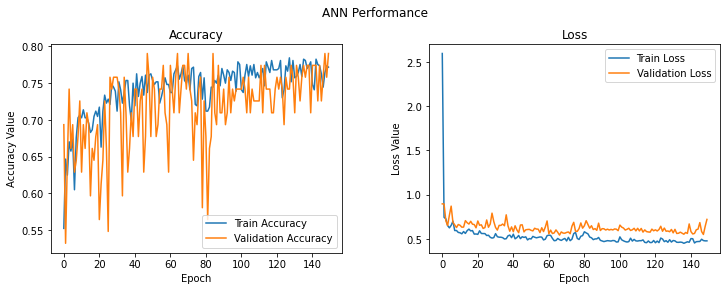

## `0` Import Libraries & Load Dataset

In [2]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.model_selection import train_test_split

import numpy as np
np.random.seed = 42
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
from keras.callbacks import EarlyStopping

In [3]:
dataset = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')
dataset.shape

(768, 9)

In [4]:
X = dataset.drop(columns=['Outcome'])
y = dataset['Outcome']

In [5]:
X.shape

(768, 8)

In [6]:
y.shape

(768,)

## Data splitting

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Early stop

In [36]:
early_stop=EarlyStopping(monitor='accuracy',patience=10,restore_best_weights=True)

## `i` Shallow network


In [103]:
model=Sequential()
model.add(Dense(5,activation='relu',input_shape=(X.shape[1],)))
model.add(Dense(1,activation='sigmoid'))
print(model.summary())

model.compile(optimizer=keras.optimizers.Adam(0.01),loss='binary_crossentropy',metrics=['accuracy'])
print('-----------------------------------------------------------------')
history = model.fit(X, y, epochs=150, batch_size=32,validation_split=0.2,callbacks=[early_stop])
print('-----------------------------------------------------------------')

print("evaluation:\n")
model.evaluate(X,y)

print("Final Acurracy",history.history['accuracy'][-1])


Model: "sequential_62"

_________________________________________________________________

Layer (type)                 Output Shape              Param #   


dense_158 (Dense)            (None, 5)                 45        

_________________________________________________________________

dense_159 (Dense)            (None, 1)                 6         


Total params: 51

Trainable params: 51

Non-trainable params: 0

_________________________________________________________________

None

-----------------------------------------------------------------

Epoch 1/150

20/20 [==============================] - 1s 7ms/step - loss: 19.6973 - accuracy: 0.4267 - val_loss: 7.8930 - val_accuracy: 0.4675

Epoch 2/150

20/20 [==============================] - 0s 2ms/step - loss: 6.7758 - accuracy: 0.4479 - val_loss: 5.0249 - val_accuracy: 0.4156

Epoch 3/150

20/20 [==============================] - 0s 2ms/step - loss: 3.2515 - accuracy: 0.4267 - val_loss: 2.2086 - val_accuracy: 0.4026

Epoc

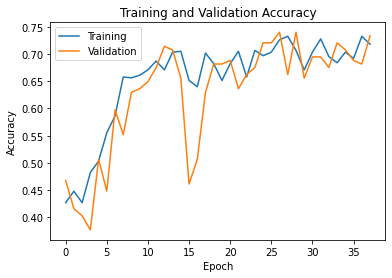

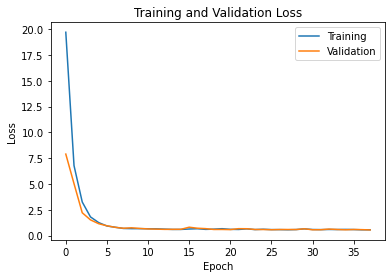

In [104]:
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


## `ii` Deep network


In [108]:
deep_moodel = Sequential()
deep_moodel.add(Dense(12, activation='relu', input_shape=(X.shape[1],)))
deep_moodel.add(Dense(8, activation='relu'))
deep_moodel.add(Dense(1, activation='sigmoid'))
deep_moodel.summary()
print('-----------------------------------------------------------------')

deep_moodel.compile(optimizer=keras.optimizers.Adam(0.01),loss='binary_crossentropy',metrics=['accuracy'])
print('-----------------------------------------------------------------')
history = deep_moodel.fit(X, y, epochs=150, batch_size=32,validation_split=0.2,callbacks=[early_stop])
print('-----------------------------------------------------------------')

print("evaluation:\n")
deep_moodel.evaluate(X,y)

print("Final Acurracy",history.history['accuracy'][-1])

Model: "sequential_66"

_________________________________________________________________

Layer (type)                 Output Shape              Param #   


dense_169 (Dense)            (None, 12)                108       

_________________________________________________________________

dense_170 (Dense)            (None, 8)                 104       

_________________________________________________________________

dense_171 (Dense)            (None, 1)                 9         


Total params: 221

Trainable params: 221

Non-trainable params: 0

_________________________________________________________________

-----------------------------------------------------------------

-----------------------------------------------------------------

Epoch 1/150

20/20 [==============================] - 0s 7ms/step - loss: 5.9937 - accuracy: 0.5261 - val_loss: 1.7712 - val_accuracy: 0.4481

Epoch 2/150

20/20 [==============================] - 0s 2ms/step - loss: 1.2051 - accuracy: 0

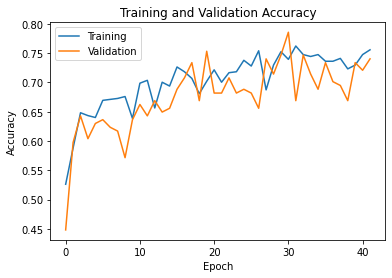

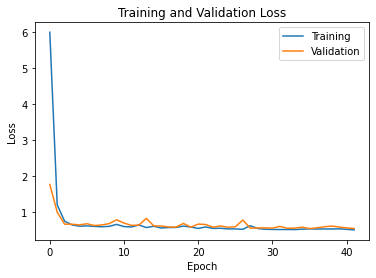

In [109]:
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


## `iii` Deeper network


In [117]:
deeper_model = Sequential()
deeper_model.add(Dense(32, activation='relu', input_shape=(X.shape[1],)))
deeper_model.add(Dense(16, activation='relu'))
deeper_model.add(Dense(8, activation='relu'))
deeper_model.add(Dense(1, activation='sigmoid'))
deeper_model.summary()
print('-----------------------------------------------------------------')

deeper_model.compile(optimizer=keras.optimizers.Adam(0.01),loss='binary_crossentropy',metrics=['accuracy'])
print('-----------------------------------------------------------------')
history = deeper_model.fit(X, y, epochs=150, batch_size=32,validation_split=0.2,callbacks=[early_stop])
print('-----------------------------------------------------------------')

print("evaluation:\n")
deeper_model.evaluate(X,y)

print("Final Acurracy",history.history['accuracy'][-1])

Model: "sequential_72"

_________________________________________________________________

Layer (type)                 Output Shape              Param #   


dense_192 (Dense)            (None, 32)                288       

_________________________________________________________________

dense_193 (Dense)            (None, 16)                528       

_________________________________________________________________

dense_194 (Dense)            (None, 8)                 136       

_________________________________________________________________

dense_195 (Dense)            (None, 1)                 9         


Total params: 961

Trainable params: 961

Non-trainable params: 0

_________________________________________________________________

-----------------------------------------------------------------

-----------------------------------------------------------------

Epoch 1/150

20/20 [==============================] - 1s 7ms/step - loss: 1.2837 - accuracy: 0.6124 - v

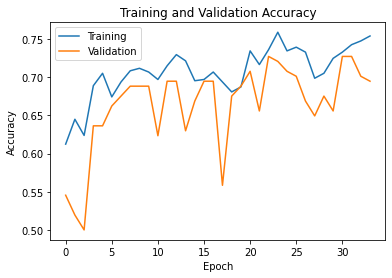

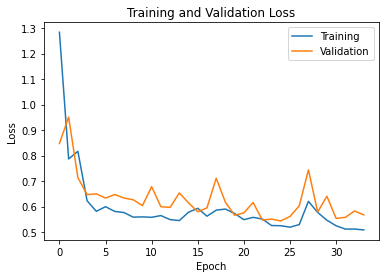

In [118]:
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


## on test data 


In [122]:
print('----------------------Models on Test data (accuracy)-----------------------')
print("shallow:",model.evaluate(X_test, y_test, verbose=0)[1])
print("---------------------------------------------------------------------------")
print("deep:",deep_moodel.evaluate(X_test, y_test, verbose=0)[1])
print("---------------------------------------------------------------------------")
print("more deep:",deeper_model.evaluate(X_test, y_test, verbose=0)[1])
print("---------------------------------------------------------------------------")


----------------------Models on Test data (accuracy)-----------------------

shallow: 0.6948052048683167

---------------------------------------------------------------------------

deep: 0.7402597665786743

---------------------------------------------------------------------------

more deep: 0.7727272510528564

---------------------------------------------------------------------------


----------------------------------------------

$$ Wish \space you \space all \space the \space best \space ♡ $$
$$ Nada \space Alswah $$